In [1]:
# ---- basics -------
from collections import OrderedDict
import numpy as np

# ---- plotting --------
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
dpi = 150 # 300
mpl.rcParams['figure.dpi']= dpi

# seaborn 
try:
    import seaborn as sns
    sns.set_style("whitegrid", {'axes.grid' : False})
except:
    None
    
# ----- pandas -----
import pandas as pd
pd.set_option('max_columns', 500)


# [Data Description (kaggle)](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)  

Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.  
MSSubClass: The building class  
MSZoning: The general zoning classification  
LotFrontage: Linear feet of street connected to property  
LotArea: Lot size in square feet  
Street: Type of road access  
Alley: Type of alley access  
LotShape: General shape of property  
LandContour: Flatness of the property  
Utilities: Type of utilities available  
LotConfig: Lot configuration  
LandSlope: Slope of property  
Neighborhood: Physical locations within Ames city limits  
Condition1: Proximity to main road or railroad  
Condition2: Proximity to main road or railroad (if a second is present)  
BldgType: Type of dwelling  
HouseStyle: Style of dwelling  
OverallQual: Overall material and finish quality  
OverallCond: Overall condition rating  
YearBuilt: Original construction date   
YearRemodAdd: Remodel date   
RoofStyle: Type of roof   
RoofMatl: Roof material   
Exterior1st: Exterior covering on house   
Exterior2nd: Exterior covering on house (if more than one material)   
MasVnrType: Masonry veneer type  
MasVnrArea: Masonry veneer area in square feet    
ExterQual: Exterior material quality   
ExterCond: Present condition of the material on the exterior  
Foundation: Type of foundation  
BsmtQual: Height of the basement  
BsmtCond: General condition of the basement  
BsmtExposure: Walkout or garden level basement walls  
BsmtFinType1: Quality of basement finished area   
BsmtFinSF1: Type 1 finished square feet   
BsmtFinType2: Quality of second finished area (if present)  
BsmtFinSF2: Type 2 finished square feet   
BsmtUnfSF: Unfinished square feet of basement area   
TotalBsmtSF: Total square feet of basement area  
Heating: Type of heating  
HeatingQC: Heating quality and condition  
CentralAir: Central air conditioning   
Electrical: Electrical system    
1stFlrSF: First Floor square feet  
2ndFlrSF: Second floor square feet  
LowQualFinSF: Low quality finished square feet (all floors)  
GrLivArea: Above grade (ground) living area square feet   
BsmtFullBath: Basement full bathrooms   
BsmtHalfBath: Basement half bathrooms   
FullBath: Full bathrooms above grade   
HalfBath: Half baths above grade   
Bedroom: Number of bedrooms above basement level   
Kitchen: Number of kitchens  
KitchenQual: Kitchen quality   
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)   
Functional: Home functionality rating   
Fireplaces: Number of fireplaces  
FireplaceQu: Fireplace quality  
GarageType: Garage location   
GarageYrBlt: Year garage was built  
GarageFinish: Interior finish of the garage  
GarageCars: Size of garage in car capacity  
GarageArea: Size of garage in square feet  
GarageQual: Garage quality  
GarageCond: Garage condition   
PavedDrive: Paved driveway   
WoodDeckSF: Wood deck area in square feet  
OpenPorchSF: Open porch area in square feet  
EnclosedPorch: Enclosed porch area in square feet  
3SsnPorch: Three season porch area in square feet  
ScreenPorch: Screen porch area in square feet    
PoolArea: Pool area in square feet   
PoolQC: Pool quality  
Fence: Fence quality  
MiscFeature: Miscellaneous feature not covered in other categories  
MiscVal: $Value of miscellaneous feature  
MoSold: Month Sold   
YrSold: Year Sold   
SaleType: Type of sale  
SaleCondition: Condition of sale   

In [2]:
path = "../data/"

df_train = pd.read_csv("{}train.csv".format(path)).set_index('Id')

print df_train.shape
df_train.head(6)

(1460, 80)


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   
6           50       RL         85.0    14115   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
6          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   
6        Norm     1Fam     1.5Fin            5            5       1993   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
6           1995     Gable  CompShg     VinylSd     VinylSd       None   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   
6          0.0        TA        TA       Wood       Gd       TA           No   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   
6           GLQ         732          Unf           0         64          796   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866        

limit_output extension: Maximum message size of 10000 exceeded with 13108 characters

In [3]:
# correcting for colums that are not Numerical but rather Categorical
l_cols = ['MSSubClass'] + ['OverallCond', 'OverallQual']
for col in l_cols:
    df_train[col]  = df_train[col].astype(str)

In [4]:
import pandas_profiling  # pip install pandas-profiling
#pandas_profiling.ProfileReport(df)

pfr = pandas_profiling.ProfileReport(df_train)
pfr.to_file("./training_profile.html")

/Users/eyalkazin/envs/venv/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
l_order = [df_train.index.name] + df_train.columns.tolist() # assuming the index.name is not null
df_meta = pfr.description_set['variables'].loc[l_order] # is a DF with MetaData

print df_meta.shape
df_meta.head(4)

(81, 34)


,count,distinct_count,is_unique,memorysize,mode,n_infinite,n_missing,p_infinite,p_missing,p_unique,top,freq,type,25%,5%,50%,75%,95%,cv,histogram,iqr,kurtosis,mad,max,mean,min,mini_histogram,n_zeros,p_zeros,range,skewness,std,sum,variance
Id,1460,1460,True,11752,1,0,0,0,0,1,NaN,NaN,NUM,365.75,73.95,730.5,1095.25,1387.05,0.577153,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",729.5,-1.2,365,1460,730.5,1,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",0,0,1459,0,421.61,1066530,177755
MSSubClass,1460,15,False,11752,20,0,0,0,0,0,20,536,CAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSZoning,1460,5,False,11752,RL,0,0,0,0,0,RL,1151,CAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,111,False,11752,60,0,259,0,1,0,NaN,NaN,NUM,59,34,69,80,107,0.346678,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",21,17.4529,16.7619,313,70.05,21,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",0,0,292,2.16357,24.2848,84130,589.749


In [6]:
# counts of special values overall
print df_meta[['n_infinite', 'n_missing', 'n_zeros']].sum()

n_infinite        0.0
n_missing      6965.0
n_zeros       17364.0
dtype: float64


In [7]:
# useful to determine ordinal features examining the number of distinct 

l_numerical = df_meta[df_meta['type'] == 'NUM'].index.tolist()
print df_meta[df_meta['type'] == 'NUM']['distinct_count'].sort_values().head(6)

HalfBath        3
BsmtHalfBath    3
Fireplaces      4
KitchenAbvGr    4
FullBath        4
BsmtFullBath    4
Name: distinct_count, dtype: object


In [8]:
# useful to determine binary/multicategorical features examining the number of distinct 
sr_distCounts =  df_meta[df_meta['type'] == 'CAT']['distinct_count'].sort_values()
print sr_distCounts.head(6)

Street        2
Utilities     2
CentralAir    2
PavedDrive    3
Alley         3
LandSlope     3
Name: distinct_count, dtype: object


In [9]:
def meta_to_types(meta, data):
    sr_distCounts =  meta[meta['type'] == 'CAT']['distinct_count'].sort_values()

    l_unary = []
    l_binary = []
    for col, distinct in sr_distCounts.iteritems():
        if distinct <= 3: # extereme case 3 values including NaN
            distinct_notNan = len(data[col].value_counts(dropna=True))
            if distinct_notNan == 1: # Unary
                l_unary.append(col)
                print col, distinct_notNan, "Unary"
            elif distinct_notNan == 2: # Binary
                l_binary.append(col)
                print col, distinct_notNan,"Binary"

    l_multiCategorical = list( (set(sr_distCounts.index.tolist()) -  set(l_binary) ) - set(l_unary)  )   

    return l_unary, l_binary, l_multiCategorical

l_unary, l_binary, l_multiCategorical = meta_to_types(df_meta, df_train)

Street 2 Binary
Utilities 2 Binary
CentralAir 2 Binary
Alley 2 Binary


In [10]:
l_ordinal = ['OverallCond', 'OverallQual']

print len(l_binary), len(l_multiCategorical), len(l_numerical)

#l_binary = list( set(l_binary) - set(l_ordinal))
#l_multiCategorical = list( set(l_multiCategorical) - set(l_ordinal))
l_numerical =  list( set(l_numerical) - set(l_ordinal))
l_multiCategorical = list( set(l_multiCategorical + l_ordinal))

print len(l_binary), len(l_multiCategorical), len(l_numerical), len(l_ordinal)

4 42 35
4 42 35 2


In [11]:
df_metaF = df_meta.copy()

df_metaF.loc[l_unary, 'data_type'] = 'unary'
df_metaF.loc[l_binary, 'data_type'] = 'binary'
#df_metaF.loc[l_ordinal, 'data_type'] = 'ordinal'
df_metaF.loc[l_multiCategorical, 'data_type'] = 'multiCategorical'
df_metaF.loc[l_numerical, 'data_type'] = 'numerical'

print df_metaF.shape
print df_metaF['type'].value_counts()
print '-' * 20
print df_metaF['data_type'].value_counts()

df_metaF.head()

(81, 35)
CAT    46
NUM    35
Name: type, dtype: int64
--------------------
multiCategorical    42
numerical           35
binary               4
Name: data_type, dtype: int64


,count,distinct_count,is_unique,memorysize,mode,n_infinite,n_missing,p_infinite,p_missing,p_unique,top,freq,type,25%,5%,50%,75%,95%,cv,histogram,iqr,kurtosis,mad,max,mean,min,mini_histogram,n_zeros,p_zeros,range,skewness,std,sum,variance,data_type
Id,1460,1460,True,11752,1,0,0,0,0,1,NaN,NaN,NUM,365.75,73.95,730.5,1095.25,1387.05,0.577153,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",729.5,-1.2,365,1460,730.5,1,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",0,0,1459,0,421.61,1066530,177755,numerical
MSSubClass,1460,15,False,11752,20,0,0,0,0,0,20,536,CAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multiCategorical
MSZoning,1460,5,False,11752,RL,0,0,0,0,0,RL,1151,CAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multiCategorical
LotFrontage,1201,111,False,11752,60,0,259,0,1,0,NaN,NaN,NUM,59,34,69,80,107,0.346678,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",21,17.4529,16.7619,313,70.05,21,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",0,0,292,2.16357,24.2848,84130,589.749,numerical
LotArea,1460,1073,False,11752,7200,0,0,0,0,0,NaN,NaN,NUM,7553.5,3311.7,9478.5,11601.5,17401.2,0.949076,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4048,203.243,3758.81,215245,10516.8,1300,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",0,0,213945,12.2077,9981.26,15354569,9.96256e+07,numerical


In [12]:
# percentages of potentially missing data per column
def print_incompleteness(meta, size, col_sort = 'n_zeros', ascending=False, normalise=True):
    df_ = meta[['n_infinite', 'n_missing', 'n_zeros']]
    if normalise:
        df_ = df_ * 100. / size
    print (df_ ).sort_values(col_sort, ascending=ascending)

    
    
print_incompleteness(df_metaF, df_train.shape[0], normalise=False, col_sort='n_missing') # 'n_zeros' 'n_missing' 'n_infinite'

             n_infinite n_missing n_zeros
PoolQC                0      1453     NaN
MiscFeature           0      1406     NaN
Alley                 0      1369     NaN
Fence                 0      1179     NaN
FireplaceQu           0       690     NaN
LotFrontage           0       259       0
GarageYrBlt           0        81       0
GarageCond            0        81     NaN
GarageType            0        81     NaN
GarageFinish          0        81     NaN
GarageQual            0        81     NaN
BsmtFinType2          0        38     NaN
BsmtExposure          0        38     NaN
BsmtQual              0        37     NaN
BsmtCond              0        37     NaN
BsmtFinType1          0        37     NaN
MasVnrArea            0         8     861
MasVnrType            0         8     NaN
Electrical            0         1     NaN
Id                    0         0       0
Functional            0         0     NaN
Fireplaces            0         0     690
KitchenQual           0         0 

In [13]:
missing_thresh = 0.15
l_missingHigh = df_meta[df_meta['n_missing'] > missing_thresh].index.tolist()

zeros_thresh = 0.15
l_zerosHigh = df_meta[df_meta['n_zeros'] > zeros_thresh].index.tolist()

print df_train.shape[1], len(l_missingHigh), len(l_zerosHigh)

80 19 23


In [14]:
l_explore = list( set(df_train.columns.tolist()) - set(l_missingHigh) - set(l_zerosHigh))
len(l_explore)

39

In [15]:
print df_train.shape

df_explore = df_train[l_explore]

print df_explore.shape

(1460, 80)
(1460, 39)


In [16]:
print df_metaF.loc[df_explore.columns, 'data_type'].value_counts()

print df_explore.isnull().sum().sum()
print_incompleteness(df_metaF.loc[df_explore.columns], df_train.shape[0], normalise=False, col_sort='n_missing')

multiCategorical    27
numerical            9
binary               3
Name: data_type, dtype: int64
0
              n_infinite n_missing n_zeros
ExterCond              0         0     NaN
Condition1             0         0     NaN
YrSold                 0         0       0
Exterior2nd            0         0     NaN
Heating                0         0     NaN
MSSubClass             0         0     NaN
YearBuilt              0         0       0
KitchenQual            0         0     NaN
Condition2             0         0     NaN
LandContour            0         0     NaN
PavedDrive             0         0     NaN
RoofMatl               0         0     NaN
Neighborhood           0         0     NaN
MoSold                 0         0       0
BldgType               0         0     NaN
ExterQual              0         0     NaN
Functional             0         0     NaN
Street                 0         0     NaN
LandSlope              0         0     NaN
TotRmsAbvGrd           0         0     

In [17]:
df_metaF.head(4)

,count,distinct_count,is_unique,memorysize,mode,n_infinite,n_missing,p_infinite,p_missing,p_unique,top,freq,type,25%,5%,50%,75%,95%,cv,histogram,iqr,kurtosis,mad,max,mean,min,mini_histogram,n_zeros,p_zeros,range,skewness,std,sum,variance,data_type
Id,1460,1460,True,11752,1,0,0,0,0,1,NaN,NaN,NUM,365.75,73.95,730.5,1095.25,1387.05,0.577153,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",729.5,-1.2,365,1460,730.5,1,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",0,0,1459,0,421.61,1066530,177755,numerical
MSSubClass,1460,15,False,11752,20,0,0,0,0,0,20,536,CAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multiCategorical
MSZoning,1460,5,False,11752,RL,0,0,0,0,0,RL,1151,CAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multiCategorical
LotFrontage,1201,111,False,11752,60,0,259,0,1,0,NaN,NaN,NUM,59,34,69,80,107,0.346678,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",21,17.4529,16.7619,313,70.05,21,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",0,0,292,2.16357,24.2848,84130,589.749,numerical


# Categorical

In [45]:
l_binary_explore = [col  for col in l_binary if col in df_explore.columns.tolist()]
l_multiCategorical_explore = [col  for col in l_multiCategorical if col in df_explore.columns.tolist()]

l_categorical_explore = l_binary_explore + l_multiCategorical_explore #+ l_ordinal
print len(l_categorical_explore), len(set(l_categorical_explore))

30 30


In [46]:
df_dummies = df_explore[[]]
for col in l_categorical_explore:
    
    df_dummies_temp = pd.get_dummies(df_explore[col])
    df_dummies_temp.columns = df_dummies_temp.columns.map(lambda x: "{}_{}".format(col, x))
    
    
    if col in l_binary:
        # dropping second column
        l_cols_dummy = sorted(df_dummies_temp.columns) #sorted(df_training[col].unique())
        df_dummies_temp.drop(l_cols_dummy[-1], axis=1, inplace=True)
    
    df_dummies = df_dummies.join(df_dummies_temp)
    
    print col, df_dummies.shape
  
print df_dummies.shape
df_dummies.head()

Street (1460, 1)
Utilities (1460, 2)
CentralAir (1460, 3)
LotConfig (1460, 8)
Exterior1st (1460, 23)
OverallCond (1460, 32)
Foundation (1460, 38)
ExterCond (1460, 43)
HeatingQC (1460, 48)
RoofStyle (1460, 54)
OverallQual (1460, 64)
LotShape (1460, 68)
PavedDrive (1460, 71)
LandSlope (1460, 74)
SaleType (1460, 83)
Heating (1460, 89)
Exterior2nd (1460, 105)
RoofMatl (1460, 113)
KitchenQual (1460, 117)
Condition2 (1460, 125)
Condition1 (1460, 134)
LandContour (1460, 138)
MSSubClass (1460, 153)
Neighborhood (1460, 178)
SaleCondition (1460, 184)
BldgType (1460, 189)
ExterQual (1460, 193)
Functional (1460, 200)
HouseStyle (1460, 208)
MSZoning (1460, 213)
(1460, 213)


Street_Grvl  Utilities_AllPub  CentralAir_N  LotConfig_Corner  \
Id                                                                  
1             0                 1             0                 0   
2             0                 1             0                 0   
3             0                 1             0                 0   
4             0                 1             0                 1   
5             0                 1             0                 0   

    LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
Id                                                                      
1                   0              0              0                 1   
2                   0              1              0                 0   
3                   0              0              0                 1   
4                   0              0              0                 0   
5                   0              1              0                 0   

    Exterior1st_AsbShng  Exterior1st_AsphShn  Exterior1st_BrkComm  \
Id                                                                  
1                     0                    0                    0   
2                     0                    0                    0   
3                     0                    0                    0   
4                     0                    0                    0   
5                     0                    0                    0   

    Exterior1st_BrkFace  Exterior1st_CBlock  Exterior1st_CemntBd  \
Id                                                                 
1                     0                   0                    0   
2                     0                   0                    0   
3                     0                   0                    0   
4                     0                   0                    0   
5                     0                   0                    0   

    Exterior1st_HdBoard  Exterior1st_ImStucc  Exterior1st_MetalSd  \
Id                                                                  
1                     0                    0                    0   
2                     0                    0                    1   
3                     0                    0                    0   
4                     0                    0                    0   
5                     0                    0                    0   

    Exterior1st_Plywood  Exterior1st_Stone  Exterior1st_Stucco  \
Id                                                               
1                     0                  0                   0   
2                     0                  0                   0   
3                     0                  0                   0   
4                     0                  0                   0   
5                     0                  0                   0   

    Exterior1st_VinylSd  Exterior1st_Wd Sdng  Exterior1st_WdShing  \
Id                                                                  
1                     1                    0                    0   
2                     0                    0                    0   
3                     1                    0                    0   
4                     0                    1                    0   
5                     1                    0                    0   

    OverallCond_1  OverallCond_2  OverallCond_3  OverallCond_4  OverallCond_5  \
Id                                                                              
1               0              0              0              0              1   
2               0              0              0              0              0   
3               0              0              0              0              1   
4               0              0              0              0              1   
5               0              0              0              0              1   

    OverallCond_6  OverallCond_7  OverallCond_8 

limit_output extension: Maximum message size of 10000 exceeded with 29472 characters

In [47]:
sr_std_dummies = df_dummies.describe().loc['std'].sort_values()

sr_std_dummies.describe()

count    213.000000
mean       0.186333
std        0.137843
min        0.026171
25%        0.073846
50%        0.150867
75%        0.268393
max        0.500164
Name: std, dtype: float64

In [48]:
std_thresh = 0.2

l_dummies_use = sr_std_dummies[sr_std_dummies >= std_thresh].index
for col in sorted(l_dummies_use):
    print col
print df_dummies[l_dummies_use].shape
df_dummies[l_dummies_use].head(4)

BldgType_1Fam
BldgType_TwnhsE
CentralAir_N
Condition1_Feedr
Condition1_Norm
ExterCond_Gd
ExterCond_TA
ExterQual_Gd
ExterQual_TA
Exterior1st_CemntBd
Exterior1st_HdBoard
Exterior1st_MetalSd
Exterior1st_Plywood
Exterior1st_VinylSd
Exterior1st_Wd Sdng
Exterior2nd_HdBoard
Exterior2nd_MetalSd
Exterior2nd_Plywood
Exterior2nd_VinylSd
Exterior2nd_Wd Sdng
Foundation_BrkTil
Foundation_CBlock
Foundation_PConc
Functional_Typ
HeatingQC_Ex
HeatingQC_Gd
HeatingQC_TA
HouseStyle_1.5Fin
HouseStyle_1Story
HouseStyle_2Story
HouseStyle_SLvl
KitchenQual_Ex
KitchenQual_Gd
KitchenQual_TA
LandContour_Bnk
LandContour_Lvl
LandSlope_Gtl
LandSlope_Mod
LotConfig_Corner
LotConfig_CulDSac
LotConfig_Inside
LotShape_IR1
LotShape_Reg
MSSubClass_120
MSSubClass_160
MSSubClass_20
MSSubClass_30
MSSubClass_50
MSSubClass_60
MSZoning_FV
MSZoning_RL
MSZoning_RM
Neighborhood_CollgCr
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_NAmes
Neighborhood_NWAmes
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_Sawyer
Neighb

Exterior1st_CemntBd  LandContour_Bnk  MSSubClass_160  MSZoning_FV  \
Id                                                                      
1                     0                0               0            0   
2                     0                0               0            0   
3                     0                0               0            0   
4                     0                0               0            0   

    LandSlope_Mod  HouseStyle_SLvl  MSSubClass_30  OverallCond_8  \
Id                                                                 
1               0                0              0              0   
2               0                0              0              1   
3               0                0              0              0   
4               0                0              0              0   

    Neighborhood_NWAmes  Neighborhood_Sawyer  Neighborhood_NridgHt  \
Id                                                                   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

    LandSlope_Gtl  Neighborhood_Gilbert  Condition1_Feedr  \
Id                                                          
1               1                     0                 0   
2               1                     0                 1   
3               1                     0                 0   
4               1                     0                 0   

    Neighborhood_Somerst  MSSubClass_120  PavedDrive_N  LotConfig_CulDSac  \
Id                                                                          
1                      0               0             0                  0   
2                      0               0             0                  0   
3                      0               0             0                  0   
4                      0               0             0                  0   

    CentralAir_N  Neighborhood_Edwards  KitchenQual_Ex  Functional_Typ  \
Id                                                                       
1              0                     0               0               1   
2              0                     0               0               1   
3              0                     0               0               1   
4              0                     0               0               1   

    SaleCondition_Abnorml  Exterior1st_Plywood  Neighborhood_OldTown  \
Id                                                                     
1                       0                    0                     0   
2                       0                    0                     0   
3                       0                    0                     0   
4                       1                    0                     0   

    BldgType_TwnhsE  OverallQual_4  PavedDrive_Y  SaleType_New  \
Id                                                               
1                 0              0             1             0   
2                 0              0             1             0   
3                 0              0             1             0   
4                 0              0             1             0   

    SaleCondition_Partial  Exterior2nd_Plywood  MSSubClass_50  \
Id                                                              
1                       0                    0              0   
2                       0                    0              0   
3                       0                    0              0   
4                       0                    0              0   

    Foundation_BrkTil  ExterCond_Gd  LandContour_Lvl  Neighborhood_CollgCr  \
Id                                                                           
1                   0             0                1                     1   
2    

limit_output extension: Maximum message size of 10000 exceeded with 10963 characters

In [49]:
print df_explore.shape
df_explore = df_explore.drop(l_categorical_explore, axis=1).join(df_dummies[l_dummies_use])

print df_explore.shape
df_explore.head(4)

(1460, 39)
(1460, 88)


LotArea  SalePrice  GrLivArea  YearRemodAdd  1stFlrSF  TotRmsAbvGrd  \
Id                                                                        
1      8450     208500       1710          2003       856             8   
2      9600     181500       1262          1976      1262             6   
3     11250     223500       1786          2002       920             6   
4      9550     140000       1717          1970       961             7   

    YrSold  YearBuilt  MoSold  Exterior1st_CemntBd  LandContour_Bnk  \
Id                                                                    
1     2008       2003       2                    0                0   
2     2007       1976       5                    0                0   
3     2008       2001       9                    0                0   
4     2006       1915       2                    0                0   

    MSSubClass_160  MSZoning_FV  LandSlope_Mod  HouseStyle_SLvl  \
Id                                                                
1                0            0              0                0   
2                0            0              0                0   
3                0            0              0                0   
4                0            0              0                0   

    MSSubClass_30  OverallCond_8  Neighborhood_NWAmes  Neighborhood_Sawyer  \
Id                                                                           
1               0              0                    0                    0   
2               0              1                    0                    0   
3               0              0                    0                    0   
4               0              0                    0                    0   

    Neighborhood_NridgHt  LandSlope_Gtl  Neighborhood_Gilbert  \
Id                                                              
1                      0              1                     0   
2                      0              1                     0   
3                      0              1                     0   
4                      0              1                     0   

    Condition1_Feedr  Neighborhood_Somerst  MSSubClass_120  PavedDrive_N  \
Id                                                                         
1                  0                     0               0             0   
2                  1                     0               0             0   
3                  0                     0               0             0   
4                  0                     0               0             0   

    LotConfig_CulDSac  CentralAir_N  Neighborhood_Edwards  KitchenQual_Ex  \
Id                                                                          
1                   0             0                     0               0   
2                   0             0                     0               0   
3                   0             0                     0               0   
4                   0             0                     0               0   

    Functional_Typ  SaleCondition_Abnorml  Exterior1st_Plywood  \
Id                                                               
1                1                      0                    0   
2                1                      0                    0   
3                1                      0                    0   
4                1                      1                    0   

    Neighborhood_OldTown  BldgType_TwnhsE  OverallQual_4  PavedDrive_Y  \
Id                                                                       
1                      0                0              0             1   
2                      0                0              0             1   
3                      0                0              0             1   
4                      0                0              0             1   

    SaleType_New  SaleCondition_Partial  Exterior2nd_Plywood  MSSubClass_50  \
Id                    

limit_output extension: Maximum message size of 10000 exceeded with 10755 characters

# Numerical

In [50]:
l_numerical_explore = [col  for col in l_numerical if col in df_explore.columns.tolist()]

In [51]:
df_meta.loc[l_numerical_explore, 'distinct_count'].sort_values()

YrSold             5
MoSold            12
TotRmsAbvGrd      12
YearRemodAdd      61
YearBuilt        112
SalePrice        663
1stFlrSF         753
GrLivArea        861
LotArea         1073
Name: distinct_count, dtype: object

0 LotArea
1 SalePrice
2 GrLivArea
3 1stFlrSF
4 YearRemodAdd
5 MoSold
6 TotRmsAbvGrd
7 YrSold
8 YearBuilt


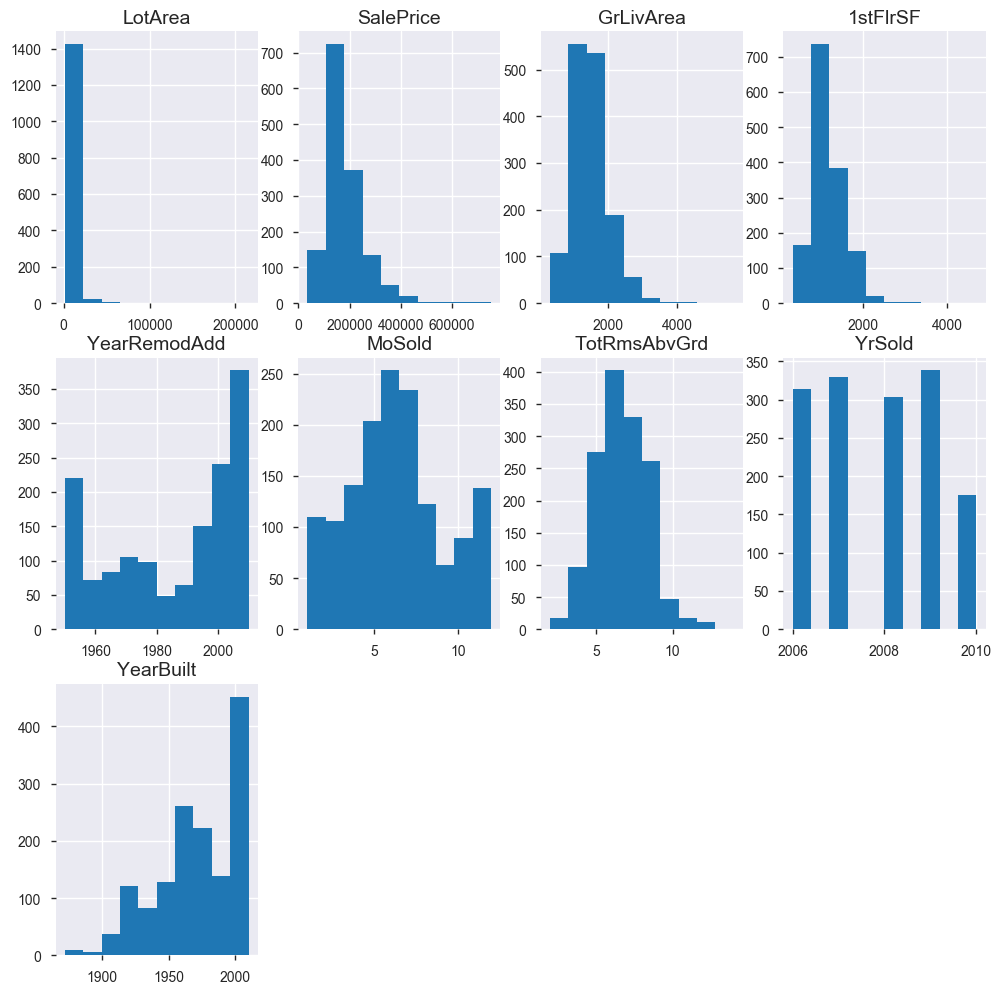

In [52]:
# using visual aid. l_col_manyNum is defined above

npanels = len(l_numerical_explore)

ncols = 4
nrows = npanels / ncols + np.sum( (npanels % ncols) != 0 )

width, height = 3, 4 
plt.figure(figsize=(width*ncols, height*nrows))

for panel, col in enumerate(l_numerical_explore):
    print panel, col
    plt.subplot(nrows, ncols, panel + 1)
    values = df_explore[col][df_explore[col].notnull()]
    
    plt.hist(values)
    plt.title(col, fontsize=14)

In [53]:
l_toLog = ['LotArea', 'SalePrice', 'GrLivArea', '1stFlrSF']
  
df_explore[l_toLog].describe(percentiles=np.arange(0., 1.1, 0.1)).T[['min', '10%', '90%', 'max']]

,min,10%,90%,max
LotArea,1300.0,5000.0,14381.7,215245.0
SalePrice,34900.0,106475.0,278000.0,755000.0
GrLivArea,334.0,912.0,2158.3,5642.0
1stFlrSF,334.0,756.9,1680.0,4692.0


In [54]:
# creating logarithmic DF
df_logs = df_train[[]]
for col in l_toLog:
    print col
    
    df_logs = df_logs.join(df_explore[col].map(np.log10))
  
df_logs.columns = df_logs.columns.map(lambda x: "{}_log10".format(x))
print df_logs.shape
df_logs.head(4)

LotArea
SalePrice
GrLivArea
1stFlrSF
(1460, 4)


,LotArea_log10,SalePrice_log10,GrLivArea_log10,1stFlrSF_log10
Id,,,,
1,3.926857,5.319106,3.232996,2.932474
2,3.982271,5.258877,3.101059,3.101059
3,4.051153,5.349278,3.251881,2.963788
4,3.980003,5.146128,3.234770,2.982723


0 LotArea_log10
1 SalePrice_log10
2 GrLivArea_log10
3 1stFlrSF_log10


,min,10%,90%,max
LotArea_log10,3.113943,3.698970,4.157810,5.332933
SalePrice_log10,4.542825,5.027248,5.444045,5.877947
GrLivArea_log10,2.523746,2.959995,3.334112,3.751433
1stFlrSF_log10,2.523746,2.879038,3.225309,3.671358


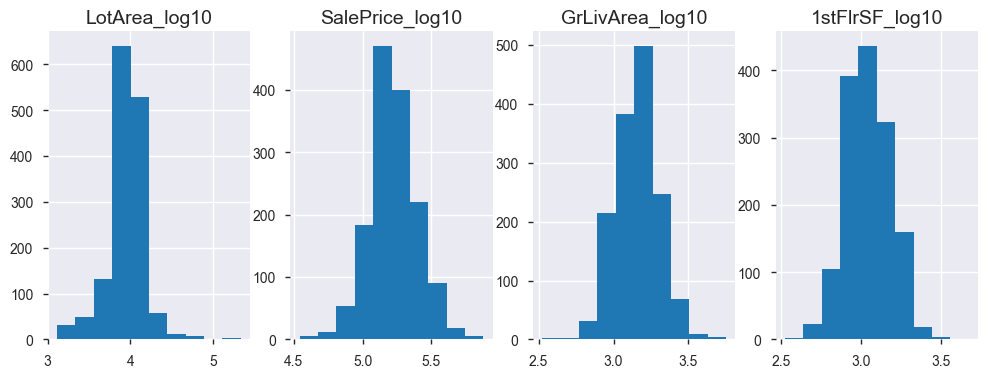

In [55]:
# using visual aid. l_col_manyNum is defined above

npanels = len(df_logs.columns.tolist())

ncols = 4
nrows = npanels / ncols + np.sum( (npanels % ncols) != 0 )

width, height = 3, 4 
plt.figure(figsize=(width*ncols, height*nrows))

for panel, col in enumerate(df_logs.columns.tolist()):
    print panel, col
    plt.subplot(nrows, ncols, panel + 1)
    values = df_logs[col][df_logs[col].notnull()]
    
    plt.hist(values)
    plt.title(col, fontsize=14)
df_logs.describe(percentiles=np.arange(0., 1.1, 0.1)).T[['min', '10%', '90%', 'max']]


In [56]:
# joining with previous data, and updating the list of columns (df_meta not updated!)
df_explore = df_explore.drop(l_toLog, axis=1).join(df_logs)

l_numerical_explore = list(set(l_numerical_explore) - set(l_toLog)) + df_logs.columns.tolist()

In [57]:
l_numerical_explore

['MoSold',
 'YrSold',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'LotArea_log10',
 'SalePrice_log10',
 'GrLivArea_log10',
 '1stFlrSF_log10']

## Standardising

In [58]:
df_standard = df_explore.copy()

l_numerical_standard = []

for col in l_numerical_explore:
    mu = df_standard[col].mean()
    sigma = df_standard[col].std()
    
    
    col_standard = "{}_standard".format(col)
    df_standard[col_standard] = (df_standard[col] - mu) / sigma
    df_standard.drop(col, axis=1, inplace=True)
    
    l_numerical_standard.append(col_standard)
    
print df_standard[l_numerical_standard].shape
df_standard[l_numerical_standard].head(4)

(1460, 9)


,MoSold_standard,YrSold_standard,YearBuilt_standard,YearRemodAdd_standard,TotRmsAbvGrd_standard,LotArea_log10_standard,SalePrice_log10_standard,GrLivArea_log10_standard,1stFlrSF_log10_standard
Id,,,,,,,,,
1,-1.598563,0.138730,1.050634,0.878367,0.911897,-0.133185,0.559876,0.529078,-0.803295
2,-0.488943,-0.614228,0.156680,-0.429430,-0.318574,0.113403,0.212692,-0.381715,0.418442
3,0.990552,0.138730,0.984415,0.829930,-0.318574,0.419917,0.733795,0.659449,-0.576363
4,-1.598563,-1.367186,-1.862993,-0.720051,0.296662,0.103311,-0.437232,0.541326,-0.439137


In [59]:
l_numerical_explore = list(l_numerical_standard)

## Correlations

For Categorical probably better to do [ANOVA](https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/)

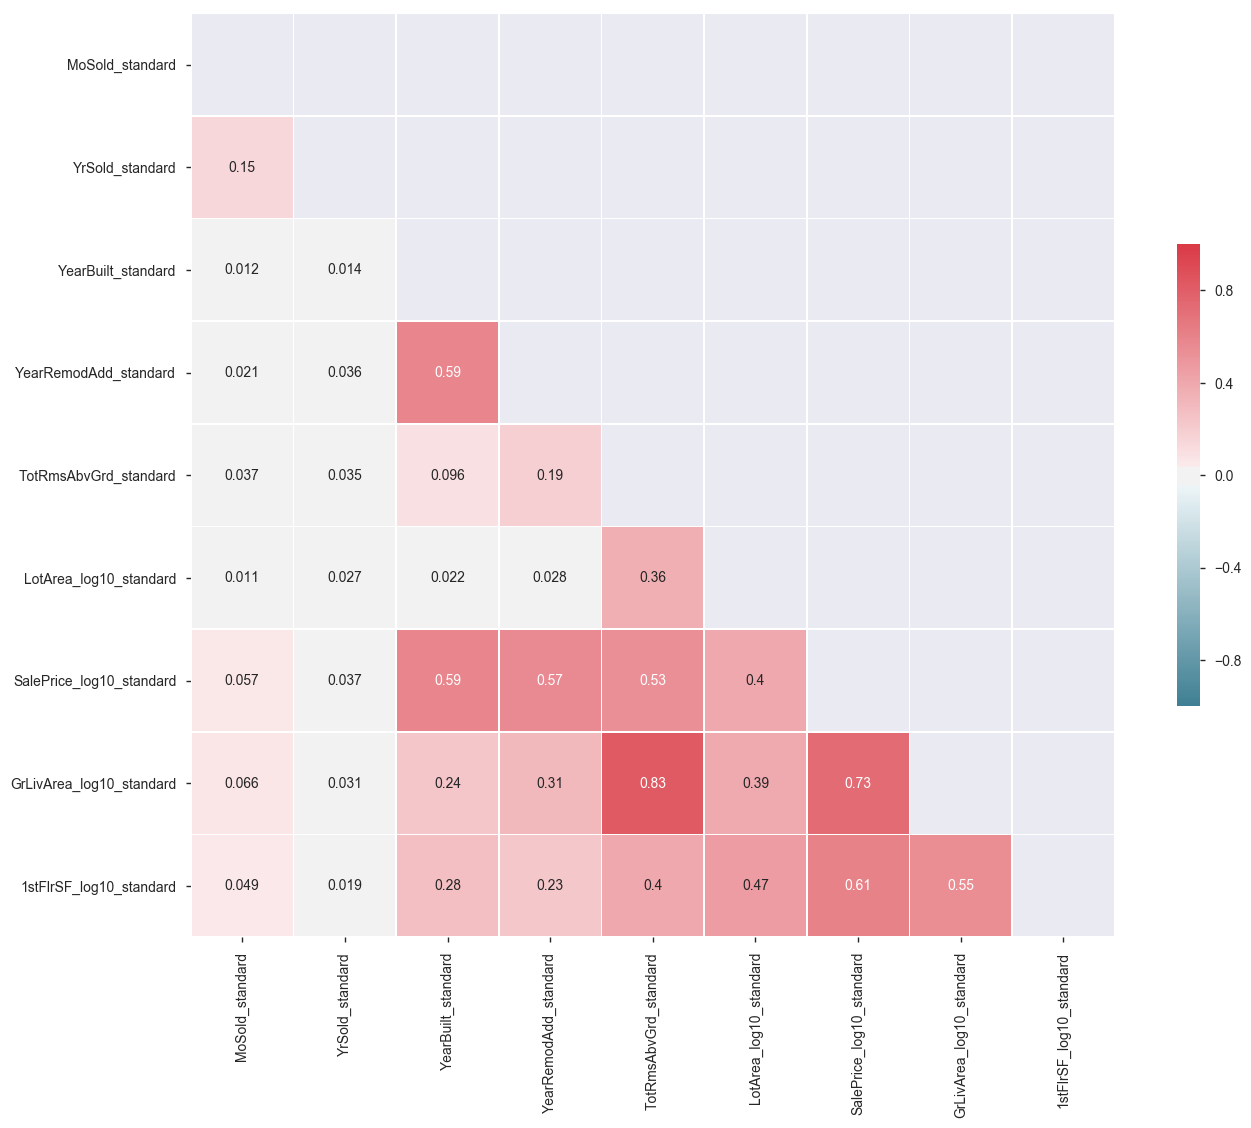

In [33]:
# plotting for correlations only numerical


corr = df_standard[l_numerical_standard].corr()
corr = corr.applymap(np.abs)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
# numerical only
col_target = 'SalePrice_log10_standard'

df_corrPearson = df_standard[l_numerical_explore].corr(method='pearson')[[col_target]]
df_corrSpearman = df_standard[l_numerical_explore].corr(method='spearman')[[col_target]]

df_corr_target = 100. * (df_corrPearson).join(df_corrSpearman, lsuffix='_pearson', rsuffix='_spearman')
df_corr_target.drop(col_target, axis=0, inplace=True)
df_corr_target['spearman_minus_pearson'] = df_corr_target[df_corr_target.columns[1]] - df_corr_target[df_corr_target.columns[0]]
df_corr_target.sort_values('spearman_minus_pearson', ascending=False, inplace=True)

df_corr_target

,SalePrice_log10_standard_pearson,SalePrice_log10_standard_spearman,spearman_minus_pearson
YearBuilt_standard,58.657024,65.268155,6.611131
LotArea_log10_standard,39.991774,45.646058,5.654284
MoSold_standard,5.732948,6.943224,1.210276
YrSold_standard,-3.726297,-2.989913,0.736383
YearRemodAdd_standard,56.560783,57.115898,0.555115
GrLivArea_log10_standard,73.025485,73.130958,0.105473
TotRmsAbvGrd_standard,53.442220,53.258594,-0.183627
1stFlrSF_log10_standard,60.894665,57.540784,-3.353882


In [35]:
# all
col_target = 'SalePrice_log10_standard'

df_corrPearson = df_standard.corr(method='pearson')[[col_target]]
df_corrSpearman = df_standard.corr(method='spearman')[[col_target]]

df_corr_target = 100. * (df_corrPearson).join(df_corrSpearman, lsuffix='_pearson', rsuffix='_spearman')
df_corr_target.drop(col_target, axis=0, inplace=True)
df_corr_target['spearman_minus_pearson'] = df_corr_target[df_corr_target.columns[1]] - df_corr_target[df_corr_target.columns[0]]
df_corr_target.sort_values('spearman_minus_pearson', ascending=False, inplace=True)

df_corr_target

,SalePrice_log10_standard_pearson,SalePrice_log10_standard_spearman,spearman_minus_pearson
OverallQual_7,26.181306,34.274482,8.093175
KitchenQual_Gd,40.660147,47.858264,7.198117
YearBuilt_standard,58.657024,65.268155,6.611131
ExterQual_Gd,50.967491,57.464188,6.496697
LotArea_log10_standard,39.991774,45.646058,5.654284
CentralAir_N,-35.160018,-31.328617,3.831401
Neighborhood_Gilbert,7.891500,11.579674,3.688174
RoofStyle_Gable,-18.874378,-15.208785,3.665593
Exterior1st_VinylSd,33.613820,37.264388,3.650568
Exterior2nd_VinylSd,33.744359,37.364514,3.620155


limit_output extension: Maximum message size of 10000 exceeded with 10750 characters

In [36]:
df_corr_target.sort_values('SalePrice_log10_standard_pearson').head(5)

,SalePrice_log10_standard_pearson,SalePrice_log10_standard_spearman,spearman_minus_pearson
ExterQual_TA,-59.588142,-63.778458,-4.190316
KitchenQual_TA,-53.823714,-58.180300,-4.356586
OverallQual_5,-37.249651,-43.788952,-6.539301
CentralAir_N,-35.160018,-31.328617,3.831401
MSZoning_RM,-34.744607,-38.077665,-3.333057


In [37]:
df_corr_target.sort_values('SalePrice_log10_standard_pearson').tail(5)

,SalePrice_log10_standard_pearson,SalePrice_log10_standard_spearman,spearman_minus_pearson
TotRmsAbvGrd_standard,53.442220,53.258594,-0.183627
YearRemodAdd_standard,56.560783,57.115898,0.555115
YearBuilt_standard,58.657024,65.268155,6.611131
1stFlrSF_log10_standard,60.894665,57.540784,-3.353882
GrLivArea_log10_standard,73.025485,73.130958,0.105473


## ANOVA
Testing for variance of the target with the categorical

In [69]:
col_target_standard = 'SalePrice_log10_standard'
l_cols = [col_target_standard]
df_testing = df_standard[l_cols].join(df_train[l_categorical_explore])
print df_testing.shape
df_testing.head(4)

(1460, 31)


,SalePrice_log10_standard,Street,Utilities,CentralAir,LotConfig,Exterior1st,OverallCond,Foundation,ExterCond,HeatingQC,RoofStyle,OverallQual,LotShape,PavedDrive,LandSlope,SaleType,Heating,Exterior2nd,RoofMatl,KitchenQual,Condition2,Condition1,LandContour,MSSubClass,Neighborhood,SaleCondition,BldgType,ExterQual,Functional,HouseStyle,MSZoning
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.559876,Pave,AllPub,Y,Inside,VinylSd,5,PConc,TA,Ex,Gable,7,Reg,Y,Gtl,WD,GasA,VinylSd,CompShg,Gd,Norm,Norm,Lvl,60,CollgCr,Normal,1Fam,Gd,Typ,2Story,RL
2,0.212692,Pave,AllPub,Y,FR2,MetalSd,8,CBlock,TA,Ex,Gable,6,Reg,Y,Gtl,WD,GasA,MetalSd,CompShg,TA,Norm,Feedr,Lvl,20,Veenker,Normal,1Fam,TA,Typ,1Story,RL
3,0.733795,Pave,AllPub,Y,Inside,VinylSd,5,PConc,TA,Ex,Gable,7,IR1,Y,Gtl,WD,GasA,VinylSd,CompShg,Gd,Norm,Norm,Lvl,60,CollgCr,Normal,1Fam,Gd,Typ,2Story,RL
4,-0.437232,Pave,AllPub,Y,Corner,Wd Sdng,5,BrkTil,TA,Gd,Gable,7,IR1,Y,Gtl,WD,GasA,Wd Shng,CompShg,Gd,Norm,Norm,Lvl,70,Crawfor,Abnorml,1Fam,TA,Typ,2Story,RL


In [83]:
col = 'Exterior1st'
thresh = 50

sr_counts = df_testing[col].value_counts()
print sr_counts.value_counts
values_toOther = sr_counts[sr_counts <= thresh].index.tolist()

idx = df_testing[df_testing[col].isin(values_toOther)].index
df_testing.loc[idx, col] = 'Other_'

print '-' * 20
print df_testing[col].value_counts()

<bound method Series.value_counts of VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64>
--------------------
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Other_     128
Plywood    108
CemntBd     61
Name: Exterior1st, dtype: int64


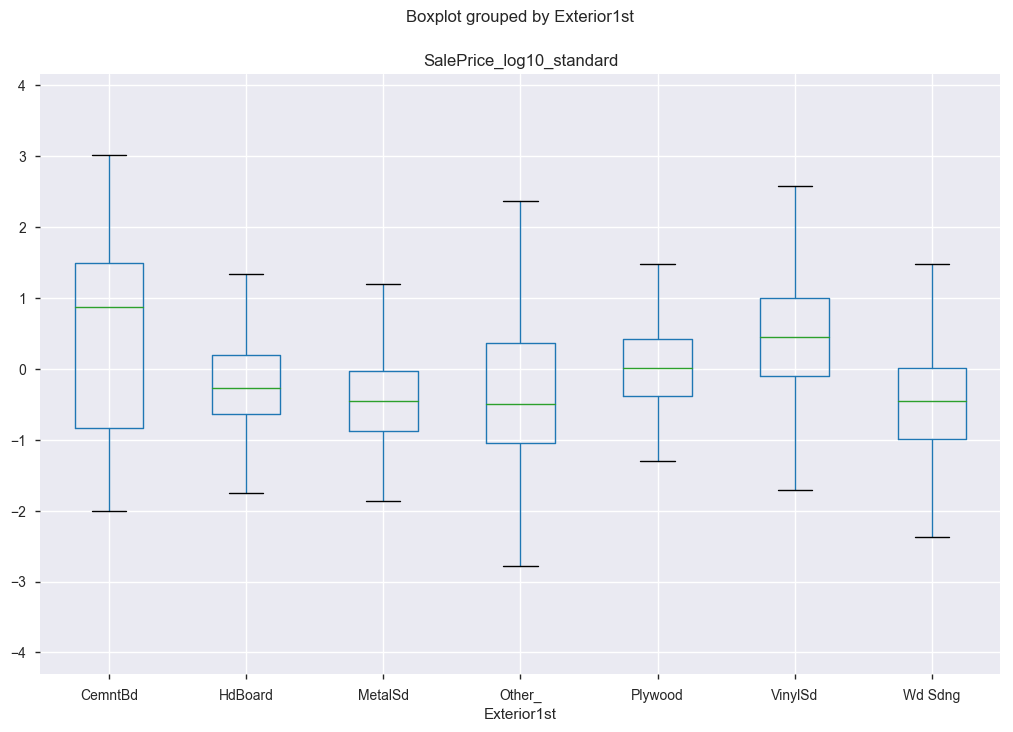

In [86]:
df_testing.boxplot(col_target_standard, by=col, figsize=(12, 8))

In [118]:
from scipy import stats
 
k = len(pd.unique(df_testing[col]))  # number of conditions
N = len(df_testing.values)  # conditions times participants
n = df_testing.groupby(col).size() #Participants in each condition

DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

![](https://s0.wp.com/latex.php?zoom=2&latex=SSbetween+%3D+%5Cfrac%7B%5Csum%28%5Csum+k_i%29+%5E2%7D+%7Bn%7D+-+%5Cfrac%7BT%5E2%7D%7BN%7D&bg=ffffff&fg=000&s=2![image.png](attachment:image.png)

In [154]:
sr_ = df_testing.groupby(col).sum()[col_target_standard]**2
sum(sr_)/n

Exterior1st
CemntBd    1251.137456
HdBoard     343.781013
MetalSd     346.906295
Other_      596.245194
Plywood     706.660971
VinylSd     148.192980
Wd Sdng     370.482451
dtype: float64

In [147]:
sum(df_testing.groupby(col).sum()[col_target_standard]**2)

76319.384822388718

In [153]:

(sum(sr_)/n)

Exterior1st
CemntBd    1251.137456
HdBoard     343.781013
MetalSd     346.906295
Other_      596.245194
Plywood     706.660971
VinylSd     148.192980
Wd Sdng     370.482451
dtype: float64

In [141]:
SSbetween = (sum(df_testing.groupby(col).sum()[col_target_standard]**2)/n) - (df_testing[col_target_standard].sum()**2)/N
SSbetween


Exterior1st
CemntBd    1251.137456
HdBoard     343.781013
MetalSd     346.906295
Other_      596.245194
Plywood     706.660971
VinylSd     148.192980
Wd Sdng     370.482451
dtype: float64

![](https://s0.wp.com/latex.php?zoom=2&latex=SSwithin+%3D+%5Csum+Y%5E2+-+%5Cfrac%7B%5Csum+%28%5Csum+a_i%29%5E2%7D%7Bn%7D&bg=ffffff&fg=000&s=2![image.png](attachment:image.png)

In [109]:
sum_y_squared = sum([value**2 for value in df_testing[col_target_standard].values])
SSwithin = sum_y_squared - sum(df_testing.groupby(col).sum()[col_target_standard]**2)/n
SSwithin

Exterior1st
CemntBd     207.862544
HdBoard    1115.218987
MetalSd    1112.093705
Other_      862.754806
Plywood     752.339029
VinylSd    1310.807020
Wd Sdng    1088.517549
dtype: float64

In [111]:
SStotal = sum_y_squared - (df_testing[col_target_standard].sum()**2)/N
SStotal

1458.999999999997

In [114]:
# Mean Square Between
# Mean square between is the sum of squares within divided by degree of freedom between.
MSbetween = SSbetween/DFbetween
MSbetween

Exterior1st
CemntBd    208.522909
HdBoard     57.296835
MetalSd     57.817716
Other_      99.374199
Plywood    117.776828
VinylSd     24.698830
Wd Sdng     61.747075
dtype: float64

In [115]:
# Mean Square Within
# Mean Square within is also an easy calculation;
MSwithin = SSwithin/DFwithin
MSwithin

Exterior1st
CemntBd    0.143057
HdBoard    0.767529
MetalSd    0.765378
Other_     0.593775
Plywood    0.517783
VinylSd    0.902138
Wd Sdng    0.749152
dtype: float64

In [117]:
# F-value
F = MSbetween/MSwithin
F

Exterior1st
CemntBd    1457.616084
HdBoard      74.651080
MetalSd      75.541423
Other_      167.360077
Plywood     227.463584
VinylSd      27.378096
Wd Sdng      82.422649
dtype: float64

In [121]:
# To reject the null hypothesis we check if the obtained F-value is above the critical value 
# for rejecting the null hypothesis. We could look it up in a F-value table based on 
# the DFwithin and DFbetween. However, there is a method in SciPy for obtaining a p-value.
p = stats.f.sf(F, DFbetween, DFwithin)
p

array([  0.00000000e+000,   2.46911768e-081,   3.27279347e-082,
         7.65097235e-162,   6.65458039e-205,   4.49857766e-031,
         6.47052127e-089])

In [122]:
# Finally, we are also going to calculate effect size. 
# We start with the commonly used eta-squared (η² ):

eta_sqrd = SSbetween/SStotal
eta_sqrd

Exterior1st
CemntBd    0.857531
HdBoard    0.235628
MetalSd    0.237770
Other_     0.408667
Plywood    0.484346
VinylSd    0.101572
Wd Sdng    0.253929
dtype: float64

In [123]:
# However, eta-squared is somewhat biased because it is based purely on sums of squares from the sample. 
# No adjustment is made for the fact that what we aiming to do is to estimate  
# is to estimate the effect size in the population. 
# Thus, we can use the less biased effect size measure Omega squared:

om_sqrd = (SSbetween - (DFbetween * MSwithin))/(SStotal + MSwithin)

om_sqrd

Exterior1st
CemntBd    0.856858
HdBoard    0.232349
MetalSd    0.234499
Other_     0.406060
Plywood    0.482046
VinylSd    0.097801
Wd Sdng    0.250719
dtype: float64

In [124]:
# ANOTHER EMETHOD WHICH I DO NOT UNDESTAND YET
classes = pd.unique(df_testing[col].values)
d_data = {class_:df_testing[col_target_standard][df_testing[col] == class_] for class_ in classes}


print d_data.keys()

F, p = stats.f_oneway(d_data['HdBoard'], d_data['VinylSd'], d_data['Wd Sdng'])
print F, p

['Other_', 'HdBoard', 'VinylSd', 'Wd Sdng', 'Plywood', 'MetalSd', 'CemntBd']
93.0495791011 1.34608751202e-37


In [127]:
import statsmodels.api as sm # pip install statsmodels
from statsmodels.formula.api import ols

mod = ols("{} ~ {}".format(col_target_standard, col),
                data=df_testing).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print aov_table

                  sum_sq      df          F        PR(>F)
Exterior1st   221.068195     6.0  43.245797  8.889110e-49
Residual     1237.931805  1453.0        NaN           NaN


In [128]:
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
esq_sm

0.15152035275501793

# PCA

In [155]:
random_state = 1

In [156]:
print df_standard.shape
df_standard.head(4)

(1460, 88)


Exterior1st_CemntBd  LandContour_Bnk  MSSubClass_160  MSZoning_FV  \
Id                                                                      
1                     0                0               0            0   
2                     0                0               0            0   
3                     0                0               0            0   
4                     0                0               0            0   

    LandSlope_Mod  HouseStyle_SLvl  MSSubClass_30  OverallCond_8  \
Id                                                                 
1               0                0              0              0   
2               0                0              0              1   
3               0                0              0              0   
4               0                0              0              0   

    Neighborhood_NWAmes  Neighborhood_Sawyer  Neighborhood_NridgHt  \
Id                                                                   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

    LandSlope_Gtl  Neighborhood_Gilbert  Condition1_Feedr  \
Id                                                          
1               1                     0                 0   
2               1                     0                 1   
3               1                     0                 0   
4               1                     0                 0   

    Neighborhood_Somerst  MSSubClass_120  PavedDrive_N  LotConfig_CulDSac  \
Id                                                                          
1                      0               0             0                  0   
2                      0               0             0                  0   
3                      0               0             0                  0   
4                      0               0             0                  0   

    CentralAir_N  Neighborhood_Edwards  KitchenQual_Ex  Functional_Typ  \
Id                                                                       
1              0                     0               0               1   
2              0                     0               0               1   
3              0                     0               0               1   
4              0                     0               0               1   

    SaleCondition_Abnorml  Exterior1st_Plywood  Neighborhood_OldTown  \
Id                                                                     
1                       0                    0                     0   
2                       0                    0                     0   
3                       0                    0                     0   
4                       1                    0                     0   

    BldgType_TwnhsE  OverallQual_4  PavedDrive_Y  SaleType_New  \
Id                                                               
1                 0              0             1             0   
2                 0              0             1             0   
3                 0              0             1             0   
4                 0              0             1             0   

    SaleCondition_Partial  Exterior2nd_Plywood  MSSubClass_50  \
Id                                                              
1                       0                    0              0   
2                       0                    0              0   
3                       0                    0              0   
4                       0                    0              0   

    Foundation_BrkTil  ExterCond_Gd  LandContour_Lvl  Neighborhood_CollgCr  \
Id                                                                           
1                   0             0                1                     1   
2    

limit_output extension: Maximum message size of 10000 exceeded with 11027 characters

In [157]:
df_standard.dtypes.value_counts(dropna=False)

uint8      79
float64     9
dtype: int64

In [158]:
col_target_standard = 'SalePrice_log10_standard'
df_X = df_standard.drop(col_target_standard, axis=1)
df_X = df_standard[l_numerical_standard]
print df_X.shape
df_X.head(4)

(1460, 9)


,MoSold_standard,YrSold_standard,YearBuilt_standard,YearRemodAdd_standard,TotRmsAbvGrd_standard,LotArea_log10_standard,SalePrice_log10_standard,GrLivArea_log10_standard,1stFlrSF_log10_standard
Id,,,,,,,,,
1,-1.598563,0.138730,1.050634,0.878367,0.911897,-0.133185,0.559876,0.529078,-0.803295
2,-0.488943,-0.614228,0.156680,-0.429430,-0.318574,0.113403,0.212692,-0.381715,0.418442
3,0.990552,0.138730,0.984415,0.829930,-0.318574,0.419917,0.733795,0.659449,-0.576363
4,-1.598563,-1.367186,-1.862993,-0.720051,0.296662,0.103311,-0.437232,0.541326,-0.439137


In [159]:
from sklearn.decomposition import PCA

n_components = 6

print df_X.shape
pca = PCA(n_components=n_components, random_state=random_state)
pca.fit(df_X.values)

print pca.explained_variance_ratio_ * 100., np.sum(pca.explained_variance_ratio_) * 100.

(1460, 9)
[ 39.25178618  16.28039294  12.65282651   9.53558655   8.91517572
   5.45572903] 92.0914969236


In [160]:
print df_X.shape
df_training_pca = pd.DataFrame(pca.transform(df_X.values), index=df_X.index)
df_training_pca.columns = df_training_pca.columns.map(lambda x: "PCA_{}".format(x))

print df_training_pca.shape

df_training_pca.head(4)

(1460, 9)
(1460, 6)


,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
Id,,,,,,
1,-1.010597,-1.026217,1.158731,0.897427,-1.228371,0.717945
2,0.090888,0.067124,-0.093811,0.898344,0.452042,-0.421389
3,-0.997030,-0.964038,-0.652440,-0.690843,0.216789,0.850345
4,0.774846,1.777609,0.307216,1.787589,-1.139641,0.182154


In [161]:
df_components = pd.DataFrame(pca.components_, index=df_training_pca.columns, columns=df_X.columns)

print df_components.shape
df_components

(6, 9)


,MoSold_standard,YrSold_standard,YearBuilt_standard,YearRemodAdd_standard,TotRmsAbvGrd_standard,LotArea_log10_standard,SalePrice_log10_standard,GrLivArea_log10_standard,1stFlrSF_log10_standard
PCA_0,-0.042571,0.023750,-0.285424,-0.300044,-0.388097,-0.279620,-0.486056,-0.457918,-0.389083
PCA_1,0.053323,-0.098007,-0.583119,-0.543387,0.324467,0.401277,-0.138762,0.214418,0.143950
PCA_2,-0.701518,0.700748,-0.058158,-0.011500,0.049421,0.093285,-0.010611,0.026589,0.036687
PCA_3,-0.687667,-0.691151,0.097208,-0.032457,-0.094996,0.134748,0.028396,-0.089328,0.054344
PCA_4,0.165694,0.126952,0.141290,-0.075900,-0.520856,0.589809,0.038613,-0.364512,0.420927
PCA_5,0.038300,-0.010273,-0.074453,0.385681,0.096363,0.599780,-0.016548,-0.057274,-0.686702


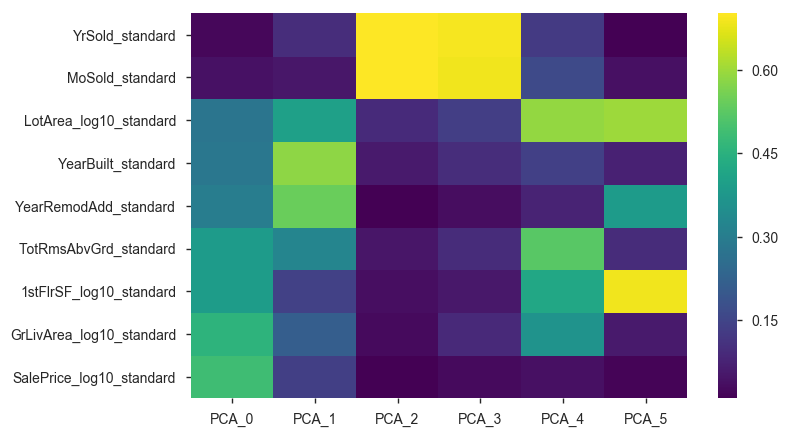

In [162]:
sort_by = 'PCA_0'

plt.figure(figsize=(8, 5))
ax = sns.heatmap(df_components.T.apply(np.abs).sort_values(sort_by) , annot=False, fmt="0.1f", cmap='viridis')

In [163]:
pca_component = 'PCA_0'
sr_component = df_components.loc[pca_component].map(np.abs).sort_values(ascending=False)
sr_plot = df_components.loc[pca_component].loc[sr_component[sr_component > 0.1].index]
sr_plot

SalePrice_log10_standard   -0.486056
GrLivArea_log10_standard   -0.457918
1stFlrSF_log10_standard    -0.389083
TotRmsAbvGrd_standard      -0.388097
YearRemodAdd_standard      -0.300044
YearBuilt_standard         -0.285424
LotArea_log10_standard     -0.279620
Name: PCA_0, dtype: float64

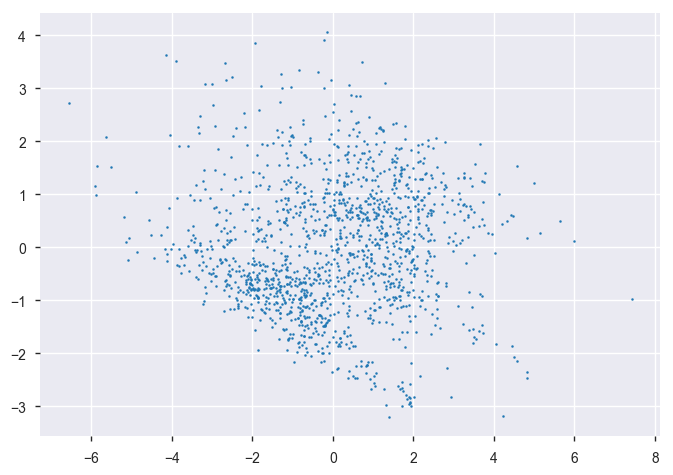

In [164]:
plt.scatter(df_training_pca['PCA_0'], df_training_pca['PCA_1'], s=2)

# Outlier Detection
[Andrew Ng](https://www.youtube.com/watch?v=ZKaOfJIjMRg) recommends manipulating all features to make them look gaussian by using Log, sqrt (or other powers)

In [220]:
df_Xoutlier = df_training_pca.copy() #.iloc[:, :2]

print df_Xoutlier.shape
df_Xoutlier.head(4)

(1460, 6)


,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
Id,,,,,,
1,-1.010597,-1.026217,1.158731,0.897427,-1.228371,0.717945
2,0.090888,0.067124,-0.093811,0.898344,0.452042,-0.421389
3,-0.997030,-0.964038,-0.652440,-0.690843,0.216789,0.850345
4,0.774846,1.777609,0.307216,1.787589,-1.139641,0.182154


## [Covariance Estimation](http://scikit-learn.org/stable/auto_examples/covariance/plot_mahalanobis_distances.html#sphx-glr-auto-examples-covariance-plot-mahalanobis-distances-py)

In [167]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet

In [168]:
# fit a Minimum Covariance Determinant (MCD) robust estimator to data
robust_cov = MinCovDet().fit(df_Xoutlier.values)

In [169]:
# compare estimators learnt from the full data set with true parameters
emp_cov = EmpiricalCovariance().fit(df_Xoutlier.values)

(1460, 2)


,Emperical,Robust
count,1460.000000,1460.000000
mean,1.742447,1.966366
std,0.331920,0.566120
min,0.679256,0.814935
0%,0.679256,0.814935
10%,1.339994,1.415221
20%,1.475249,1.571098
30.0%,1.556325,1.673081
40%,1.646985,1.760374
50%,1.727755,1.843121


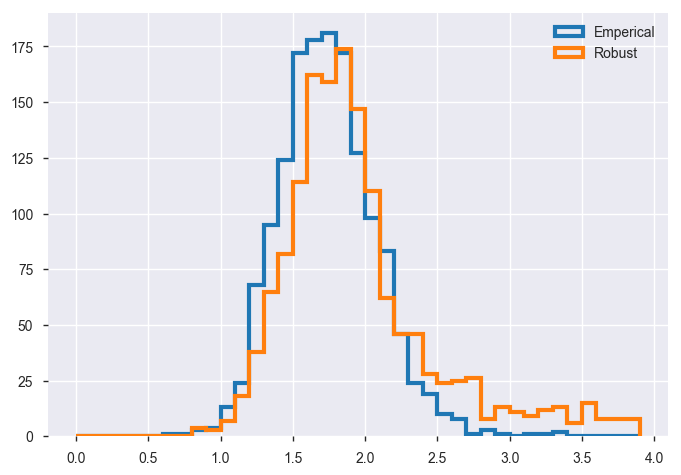

In [178]:
# Plot the scores for each point
emp_mahal = emp_cov.mahalanobis(df_Xoutlier - np.mean(df_Xoutlier.values, 0)) ** (0.33)
robust_mahal = robust_cov.mahalanobis(df_Xoutlier - robust_cov.location_) ** (0.33)
df_mahal = pd.DataFrame({'Emperical': emp_mahal, 'Robust': robust_mahal})

print df_mahal.shape
df_mahal.head(4)

bins = np.arange(0., 4, 0.1)
normed = False
plt.hist(df_mahal['Emperical'], bins=bins, normed=normed, histtype='step', linewidth=3, label='Emperical')
plt.hist(df_mahal['Robust'], bins=bins, normed=normed, histtype='step', linewidth=3, label='Robust')
plt.legend()
#plt.scatter(df_mahal['Emperical'], df_mahal['Robust'], s=10)
df_mahal.describe(percentiles=np.arange(0.,1,0.1))

In [184]:
col = 'Robust'
thresh = 3. #df_mahal[col].describe(percentiles=np.arange(0.,1,0.1))['90%']

bool_ = df_mahal[col] > thresh
idx_outliers = df_mahal[bool_].index
idx_inliers = df_mahal[~bool_].index

print len(idx_outliers), len(idx_inliers)

99 1361


PCA_1 PCA_2


([], <a list of 0 Text yticklabel objects>)

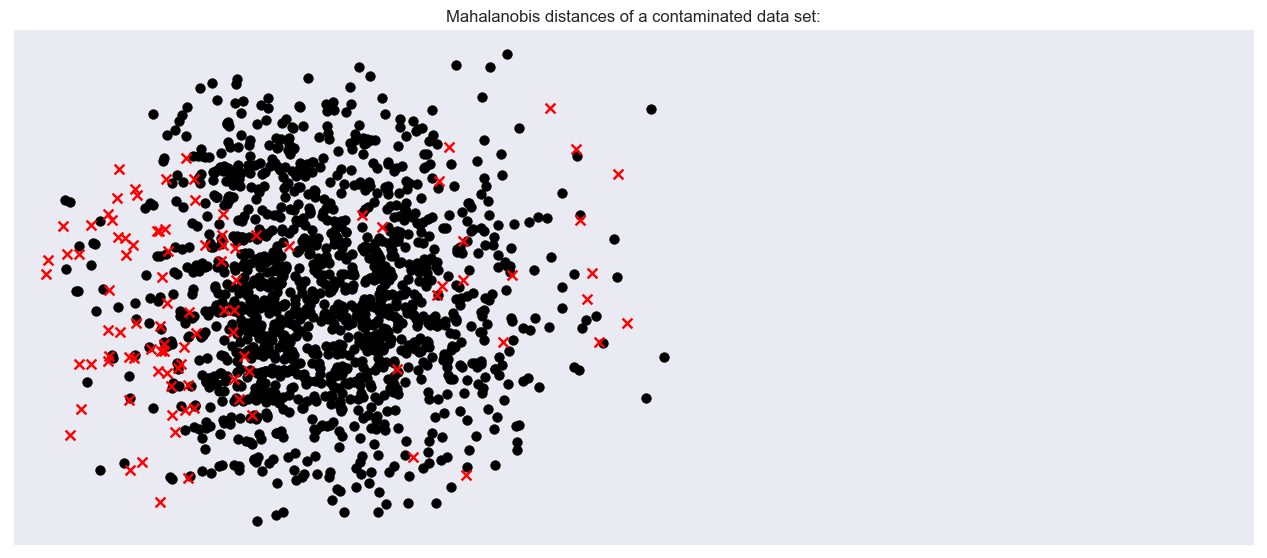

In [189]:
# Display results
colx = df_Xoutlier.columns[0]
coly = df_Xoutlier.columns[1]
print colx, coly


fig = plt.figure(figsize=(16,16))
plt.subplots_adjust(hspace=-.1, wspace=.4, top=.95, bottom=.05)

# Show data set
subfig1 = plt.subplot(3, 1, 1)
markerSize = 50
inlier_plot = subfig1.scatter(df_Xoutlier.loc[idx_inliers, colx], df_Xoutlier.loc[idx_inliers, coly],s=markerSize,
                              color='black', label='training')
outlier_plot = subfig1.scatter(df_Xoutlier.loc[idx_outliers, colx], df_Xoutlier.loc[idx_outliers, coly], s=markerSize, marker='x',
                               color='red', label='outliers')
#subfig1.set_xlim(subfig1.get_xlim()[0], 11.)
subfig1.set_title("Mahalanobis distances of a contaminated data set:")

# Show contours of the distance functions
xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
zz = np.c_[xx.ravel(), yy.ravel()]

if df_Xoutlier.shape[1] == 2:
    mahal_emp_cov = emp_cov.mahalanobis(zz)
    mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
    emp_cov_contour = subfig1.contour(xx, yy, np.sqrt(mahal_emp_cov),
                                      cmap=plt.cm.PuBu_r,
                                      linestyles='dashed')

    mahal_robust_cov = robust_cov.mahalanobis(zz)
    mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
    robust_contour = subfig1.contour(xx, yy, np.sqrt(mahal_robust_cov),
                                     cmap=plt.cm.YlOrBr_r, linestyles='dotted')


    subfig1.legend([emp_cov_contour.collections[1], robust_contour.collections[1],
                    inlier_plot, outlier_plot],
                   ['MLE dist', 'robust dist', 'in-liers', 'out-liers'],
                   loc="upper right", borderaxespad=0)
plt.xticks(())
plt.yticks(())


## [One-class SVM](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) 
Here we use a non-linear kernel called RBF

In [196]:
from sklearn.svm import OneClassSVM

In [227]:
clf_svm = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.001)
clf_svm.fit(df_Xoutlier)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.001, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [228]:
#y_pred_train = 
df_youtlier = pd.DataFrame(pd.Series(clf_svm.predict(df_Xoutlier), index=df_Xoutlier.index), columns=['prediction'])
bool_ = df_youtlier['prediction'] == -1

idx_outliers = df_youtlier[bool_].index
idx_inliers = df_youtlier[~bool_].index

print len(idx_outliers), len(idx_inliers)

145 1315


PCA_0 PCA_1


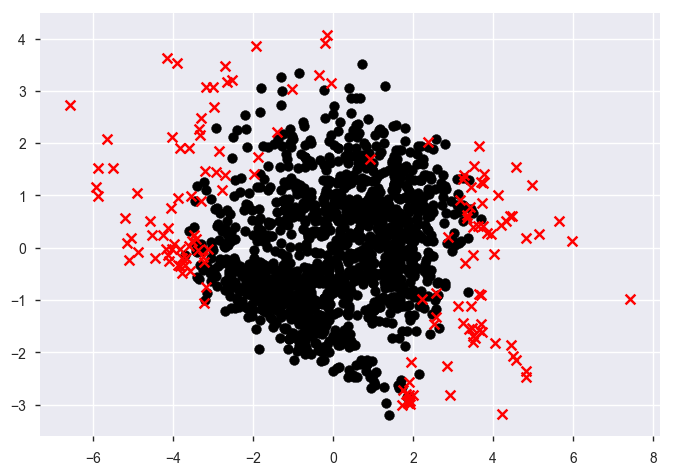

In [229]:
colx = df_Xoutlier.columns[0]
coly = df_Xoutlier.columns[1]
print colx, coly
inlier_plot = plt.scatter(df_Xoutlier.loc[idx_inliers, colx], df_Xoutlier.loc[idx_inliers, coly],s=markerSize,
                              color='black', label='training')
outlier_plot = plt.scatter(df_Xoutlier.loc[idx_outliers, colx], df_Xoutlier.loc[idx_outliers, coly], s=markerSize, marker='x',
                               color='red', label='outliers')

## [Isolation Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)
[example](http://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py)

In [191]:
from sklearn.ensemble import IsolationForest

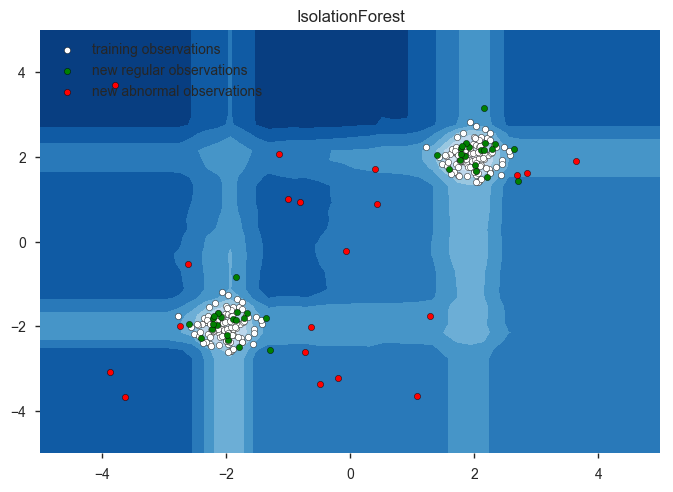

In [66]:


rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

 1    1314
-1     146
dtype: int64


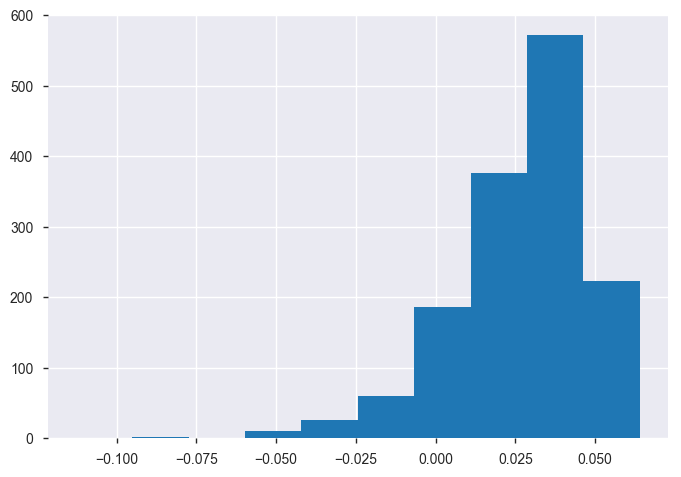

In [194]:
clf_isolation = IsolationForest(verbose=0, contamination=0.1, n_estimators=100, 
                                max_samples='auto', random_state=4, n_jobs=-1, max_features=1) 
clf_isolation.fit(df_Xoutlier)
sr_inOutliers = pd.Series(clf_isolation.predict(df_Xoutlier.values), index=df_Xoutlier.index )

sr_decisionResult = pd.Series(clf_isolation.decision_function(df_Xoutlier), index=df_explore.index )
print sr_inOutliers.value_counts(dropna=False)

sr_decisionResult.hist()

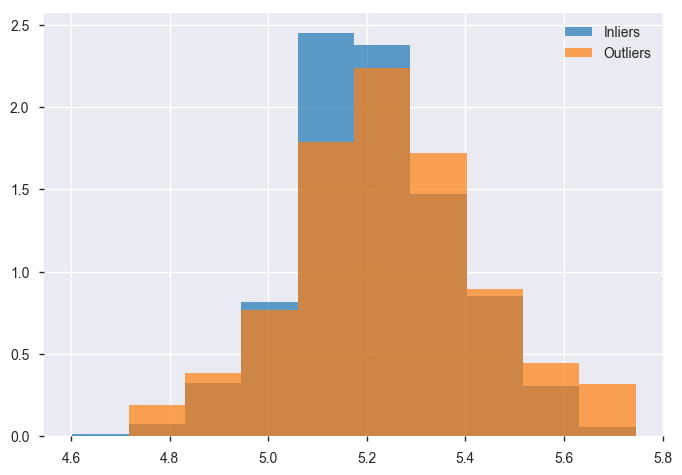

In [195]:
bool_ = sr_inOutliers == 1

hist_details = plt.hist(df_explore.loc[bool_, 'SalePrice_log10'], label="Inliers", alpha=0.7, normed=True)
hist_details = plt.hist(df_explore.loc[~bool_, 'SalePrice_log10'], label="Outliers", bins=hist_details[1], alpha=0.7, normed=True)
plt.legend()

# Clustering

In [193]:
del clf

In [50]:
from sklearn.cluster import KMeans

In [51]:
n_clusters = 2
max_iter = 500

kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, max_iter=max_iter).fit(df_training_pca.values)
print kmeans.n_iter_, " Iterations in practice"
kmeans.cluster_centers_

6  Iterations in practice


array([[  1.93152861e+00,  -5.47157334e-01,   7.61786903e-02,
         -8.31547716e-03,   2.57581135e-02,   7.84350980e-03,
          4.54362417e-02,  -5.91445069e-02,   9.17943772e-02,
         -1.66835629e-02,   1.45620424e-02,   2.81644013e-02,
         -8.07733620e-03,  -3.81863348e-04,   2.32991784e-03,
         -1.31076089e-02,  -1.37738372e-02,  -1.15857807e-02,
         -1.09090956e-02,  -6.51019093e-03,  -3.83915668e-03],
       [ -1.37061632e+00,   3.88263869e-01,  -5.40565413e-02,
          5.90067817e-03,  -1.82780056e-02,  -5.56576925e-03,
         -3.22416422e-02,   4.19690529e-02,  -6.51374621e-02,
          1.18386875e-02,  -1.03332526e-02,  -1.99855119e-02,
          5.73169290e-03,   2.70970947e-04,  -1.65331406e-03,
          9.30118384e-03,   9.77394069e-03,   8.22129171e-03,
          7.74111467e-03,   4.61964368e-03,   2.72427277e-03]])

In [52]:
df_results = df_training_pca.copy()
df_results['segment'] = pd.Series(kmeans.labels_, index=df_standard.index)

print df_results.shape
df_results.head(4)

(1460, 22)


,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,segment
Id,,,,,,,,,,,,,,,,,,,,,,
1,2.039371,-1.293308,1.297310,1.452867,1.203269,0.492130,0.083289,-0.613789,-0.429789,-0.787547,-0.100627,-0.242227,-0.360611,0.133839,-0.382985,0.058332,0.136594,0.253873,0.001577,0.055379,-0.177116,0
2,-0.844627,0.375920,-0.924496,-0.135504,0.716106,-0.378066,-0.179966,0.329339,-0.274430,-0.104246,0.590480,-0.396397,-0.371307,0.476184,1.255541,-0.003012,0.197666,-0.481044,-0.233399,0.082383,-0.879044,1
3,2.075965,-1.212294,0.672287,-0.439010,-0.483627,1.636555,0.350772,-0.305436,0.546739,-0.484827,-0.089049,-0.238158,-0.214735,-0.403842,-0.129370,-0.001090,0.098889,0.377787,0.252123,0.168842,0.114447,0
4,-0.652694,1.221047,1.286806,0.183551,2.147146,0.079874,0.877144,0.407119,1.300560,0.480808,-0.207606,0.228194,0.288604,0.687524,-0.747696,0.300191,-0.100578,-0.162779,-0.827767,1.048819,0.249464,1


In [53]:
df_segment = pd.DataFrame(pd.Series(kmeans.labels_, index=df_standard.index), columns=['segment_number'])
print df_segment['segment_number'].value_counts(normalize=True)
print df_segment.shape
df_segment.head(4)

1    0.584932
0    0.415068
Name: segment_number, dtype: float64
(1460, 1)


,segment_number
Id,
1,0
2,1
3,0
4,1


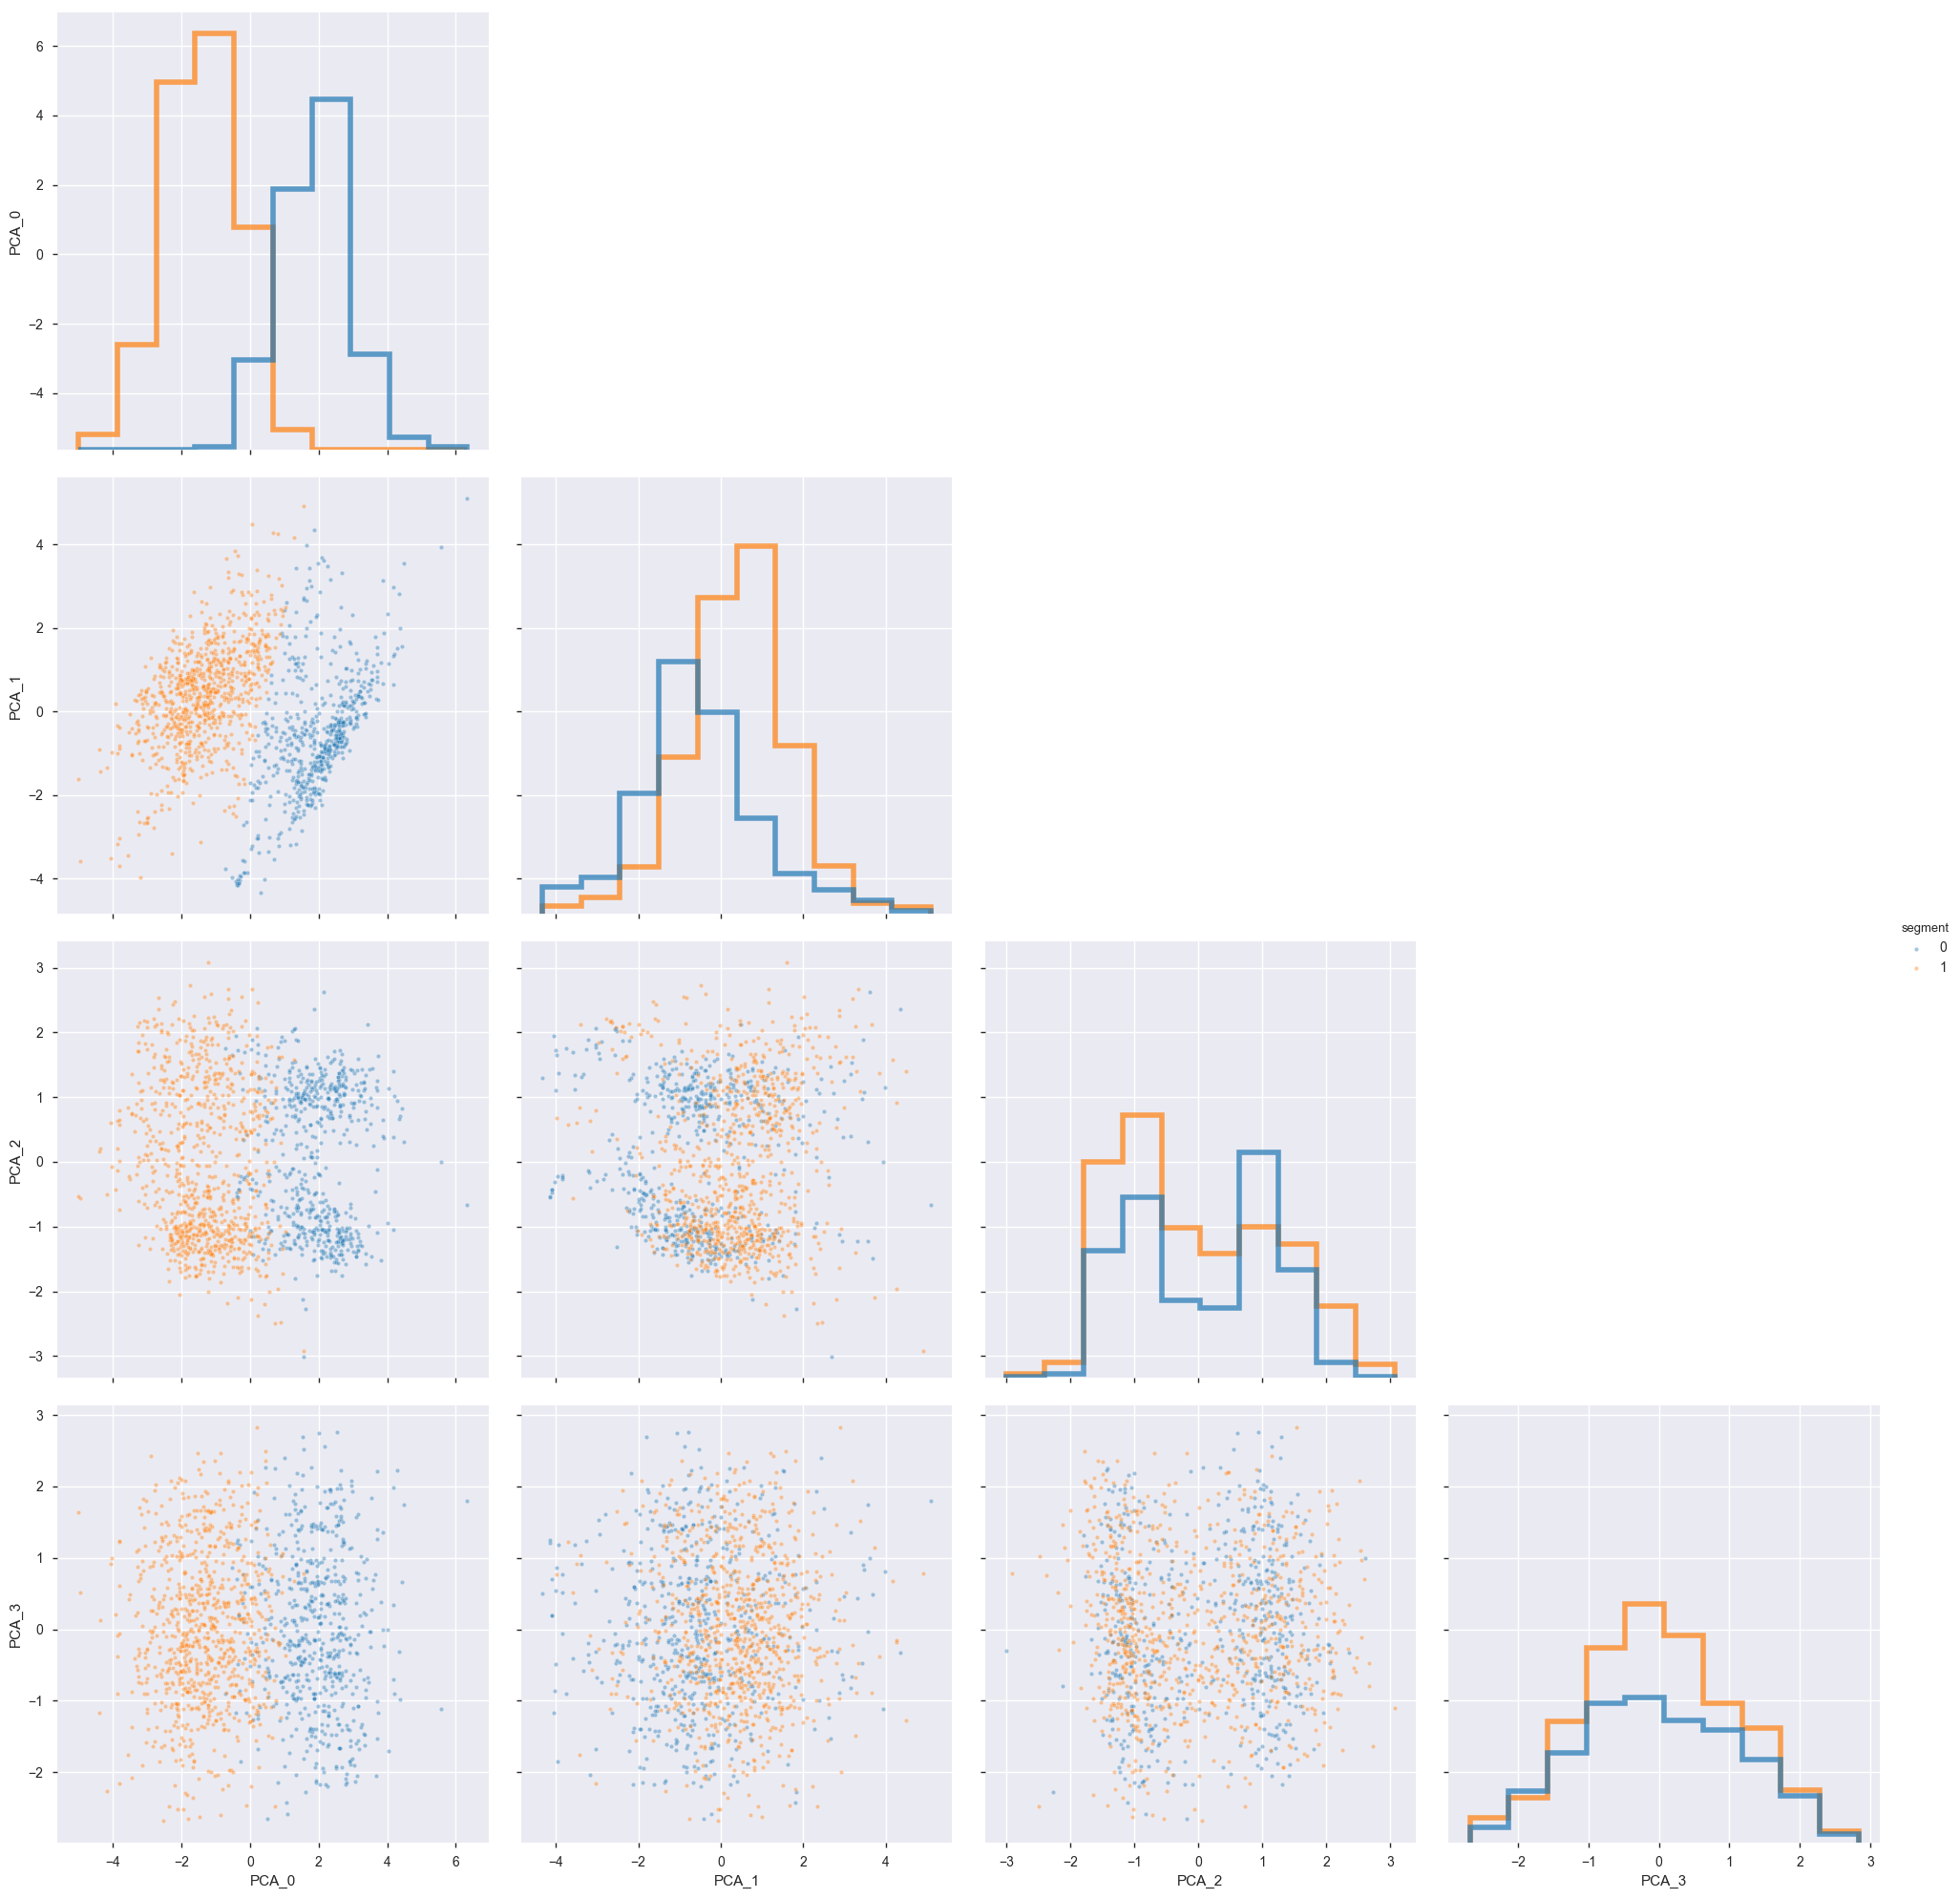

In [54]:
l_cols_plot = ['PCA_0', 'PCA_1', 'PCA_2', 'PCA_3']

colT = 'segment'

df_plot = df_results[l_cols_plot + [colT]] #.sample(10000)

g = sns.pairplot(df_plot, hue=colT, vars=l_cols_plot, size=5., diag_kws={"alpha": 0.7, 'histtype':'step', 'linewidth':4.}, plot_kws={"alpha": 0.4, "s":10}) #, plot_kws={"alpha": '0.7'})
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

## Knee Curve

In [55]:
from scipy.spatial.distance import cdist

1 2
2 4
3 8
4 11
5 30
6 27
7 25
8 27
9 23
10 23
11 28
12 28
13 23
14 47
15 26
16 32
17 19
18 35
19 25


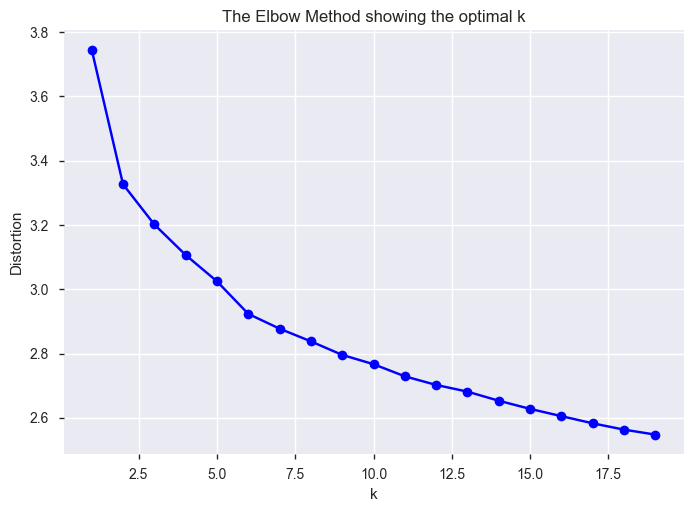

In [56]:
X = df_training_pca.values.copy()

distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=max_iter).fit(X)
    print k, kmeanModel.n_iter_
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'b-o')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Linear Regression

In [57]:
print df_standard.shape
df_standard.head()

(1460, 88)


Exterior1st_CemntBd  LandContour_Bnk  MSSubClass_160  MSZoning_FV  \
Id                                                                      
1                     0                0               0            0   
2                     0                0               0            0   
3                     0                0               0            0   
4                     0                0               0            0   
5                     0                0               0            0   

    LandSlope_Mod  HouseStyle_SLvl  MSSubClass_30  OverallCond_8  \
Id                                                                 
1               0                0              0              0   
2               0                0              0              1   
3               0                0              0              0   
4               0                0              0              0   
5               0                0              0              0   

    Neighborhood_NWAmes  Neighborhood_Sawyer  Neighborhood_NridgHt  \
Id                                                                   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   
5                     0                    0                     0   

    LandSlope_Gtl  Neighborhood_Gilbert  Condition1_Feedr  \
Id                                                          
1               1                     0                 0   
2               1                     0                 1   
3               1                     0                 0   
4               1                     0                 0   
5               1                     0                 0   

    Neighborhood_Somerst  MSSubClass_120  PavedDrive_N  LotConfig_CulDSac  \
Id                                                                          
1                      0               0             0                  0   
2                      0               0             0                  0   
3                      0               0             0                  0   
4                      0               0             0                  0   
5                      0               0             0                  0   

    CentralAir_N  Neighborhood_Edwards  KitchenQual_Ex  Functional_Typ  \
Id                                                                       
1              0                     0               0               1   
2              0                     0               0               1   
3              0                     0               0               1   
4              0                     0               0               1   
5              0                     0               0               1   

    SaleCondition_Abnorml  Exterior1st_Plywood  Neighborhood_OldTown  \
Id                                                                     
1                       0                    0                     0   
2                       0                    0                     0   
3                       0                    0                     0   
4                       1                    0                     0   
5                       0                    0                     0   

    BldgType_TwnhsE  OverallQual_4  PavedDrive_Y  SaleType_New  \
Id                                                               
1                 0              0             1             0   
2                 0              0             1             0   
3                 0              0             1             0   
4                 0              0             1             0   
5                 0              0             1             0   

    SaleCondition_Partial  Exterior2nd_Plywood  MSSubClass_50  \
Id  

limit_output extension: Maximum message size of 10000 exceeded with 12622 characters

In [58]:
n_components_model = 4
df_X = df_training_pca.iloc[:, :n_components_model]
df_y = pd.DataFrame(df_explore['SalePrice_log10']).rename(columns={'SalePrice_log10': 'true'})

print df_y.head(4)
df_X.head(4)

        true
Id          
1   5.319106
2   5.258877
3   5.349278
4   5.146128


,PCA_0,PCA_1,PCA_2,PCA_3
Id,,,,
1,2.039371,-1.293308,1.297310,1.452867
2,-0.844627,0.375920,-0.924496,-0.135504
3,2.075965,-1.212294,0.672287,-0.439010
4,-0.652694,1.221047,1.286806,0.183551


In [59]:
from sklearn.linear_model import LinearRegression

clf_linear = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1)

clf_linear.fit(df_X.values, df_y['true'].values)

/Users/eyalkazin/envs/venv/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [60]:
clf_linear.score(df_X.values, df_y['true'].values)

0.76739404518746568

In [61]:
help(clf_linear.score)

Help on method score in module sklearn.base:

score(self, X, y, sample_weight=None) method of sklearn.linear_model.base.LinearRegression instance
    Returns the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True values for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : 

In [62]:
df_y['prediction'] = pd.Series(clf_linear.predict(df_X), index=df_y.index)

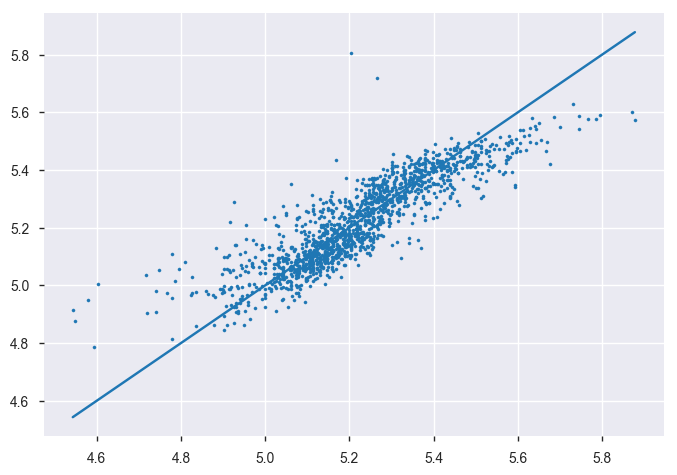

In [63]:
plt.scatter(df_y['true'], df_y['prediction'], s=5)

min_, max_ = df_y['true'].min(), df_y['true'].max()
plt.plot([min_, max_], [min_, max_])

In [78]:
from sklearn.model_selection import cross_validate

cv = 5
scoring = None
scores = cross_validate(clf_linear, df_X.values, df_y['true'], scoring=scoring,
                        cv=cv, return_train_score=True, n_jobs=-1)
df_scores = pd.DataFrame(scores)
df_scores.index.name = 'iteration'

print df_scores.shape
df_scores.head(4)

(5, 4)


,fit_time,score_time,test_score,train_score
iteration,,,,
0,0.004926,0.001729,0.784624,0.763191
1,0.004693,0.001395,0.788621,0.761081
2,0.004787,0.001616,0.785081,0.762253
3,0.003868,0.001614,0.756787,0.768815


In [79]:
print "{:0.3f} mean, {:0.3f} std Test Score".format(df_scores['test_score'].mean(), df_scores['test_score'].var())
print "{:0.3f} mean, {:0.3f} std Train Score".format(df_scores['train_score'].mean(), df_scores['train_score'].var())

0.764 mean, 0.001 std Test Score
0.767 mean, 0.000 std Train Score


In [159]:
from sklearn.model_selection import train_test_split

In [161]:
import sklearn

In [162]:
sklearn.__version__

'0.18.2'